# UNDERSTANDING THE DATA

**Importing The Required Libraries**<br>TSK-119020

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps

**Loading The Data**<br>TSK-119021

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


**Analyzing The Data**<br>TSK-119022


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

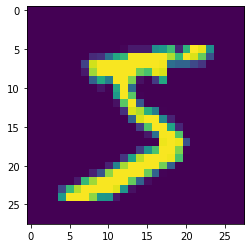

In [6]:
plt.imshow(X_train[0])

**Reshaping The Data**<br>TSK-119023

In [7]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

**Applying One Hot Encoding**<br> TSK-119024

In [8]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [9]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# MODEL BUILDING

**Add CNN Layers**<br>TSK-119044

In [10]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

**Compiling The Model**<br>TSK-119050

In [11]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

**Train The Model**<br>TSK-119049

In [12]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 198s 105ms/step - loss: 0.2768 - accuracy: 0.9490 - val_loss: 0.1005 - val_accuracy: 0.9680
Epoch 2/5
1875/1875 [==============================] - 188s 100ms/step - loss: 0.0727 - accuracy: 0.9782 - val_loss: 0.0880 - val_accuracy: 0.9741
Epoch 3/5
1875/1875 [==============================] - 188s 100ms/step - loss: 0.0503 - accuracy: 0.9844 - val_loss: 0.0939 - val_accuracy: 0.9721
Epoch 4/5
1875/1875 [==============================] - 190s 101ms/step - loss: 0.0393 - accuracy: 0.9876 - val_loss: 0.1028 - val_accuracy: 0.9772
Epoch 5/5
1875/1875 [==============================] - 190s 101ms/step - loss: 0.0282 - accuracy: 0.9908 - val_loss: 0.1289 - val_accuracy: 0.9738


**Observing The Metrics**<br>TSK-119087

In [13]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.12890693545341492, 0.973800003528595]


**Test The Model**<br>TSK-119094


In [14]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 94ms/step
[[4.63159691e-15 8.60432433e-20 3.67382150e-13 6.69212186e-10
  1.40539190e-16 6.56928546e-21 7.31381407e-23 1.00000000e+00
  1.15939064e-10 1.99865905e-11]
 [7.74138812e-07 6.29397473e-05 9.99932766e-01 8.38236716e-08
  2.23092527e-13 5.32025166e-17 3.47321679e-06 3.65285923e-16
  1.24600366e-08 8.50819383e-17]
 [5.56304247e-09 9.99551356e-01 1.53047404e-06 8.57254285e-12
  3.03707088e-06 2.69032849e-08 4.27411607e-07 1.29576661e-09
  4.43613972e-04 4.13197387e-09]
 [1.00000000e+00 2.73709443e-15 3.62433803e-12 1.08703648e-13
  6.96569257e-17 1.14991946e-12 1.47826525e-11 6.15069246e-11
  4.79986580e-12 2.10103774e-08]]


**Observing The Metrics**<br>TSK-119097




In [ ]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

**Test The Model**<br>TSK-1190101


In [15]:
prediction=model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 27ms/step
[[4.63159691e-15 8.60432433e-20 3.67382150e-13 6.69212186e-10
  1.40539190e-16 6.56928546e-21 7.31381407e-23 1.00000000e+00
  1.15939064e-10 1.99865905e-11]
 [7.74138812e-07 6.29397473e-05 9.99932766e-01 8.38236716e-08
  2.23092527e-13 5.32025166e-17 3.47321679e-06 3.65285923e-16
  1.24600366e-08 8.50819383e-17]
 [5.56304247e-09 9.99551356e-01 1.53047404e-06 8.57254285e-12
  3.03707088e-06 2.69032849e-08 4.27411607e-07 1.29576661e-09
  4.43613972e-04 4.13197387e-09]
 [1.00000000e+00 2.73709443e-15 3.62433803e-12 1.08703648e-13
  6.96569257e-17 1.14991946e-12 1.47826525e-11 6.15069246e-11
  4.79986580e-12 2.10103774e-08]]


**Save the model**<br>TSK-119105


In [16]:
model.save("model.h5")

**Test the saved model**<br>TSK-1190106

In [19]:
model=load_model("model.h5")

In [20]:
img = Image.open("sample.png").convert("L")
img = img.resize((28, 28))
img2arr = np.array(img)
img2arr = img2arr.reshape(1, 28, 28, 1)
results  = model.predict(img2arr)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
print(results)

1/1 [==============================] - 0s 66ms/step
0    0
Name: Label, dtype: int64
